Dependencies

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib as Path

In [ ]:
#EDA
standardscaler, kmean

Dataset

In [54]:
#Read CSV file into pandas DF
music=pd.read_csv("Resources/spotify_top50_2021.csv")
music.head()
#music=Path('Resources/spotify_top50_2021.csv')
#music

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [75]:
from pandas import isnull


def count_null_df():
    for column in music.columns:
        print(f"Column {column} has {music[ column ].isnull().sum()} null values")
    return count_null_df
# call the function to return data
df = count_null_df()

Column id has 0 null values
Column artist_name has 0 null values
Column track_name has 0 null values
Column track_id has 0 null values
Column popularity has 0 null values
Column danceability has 0 null values
Column energy has 0 null values
Column key has 0 null values
Column loudness has 0 null values
Column mode has 0 null values
Column speechiness has 0 null values
Column acousticness has 0 null values
Column instrumentalness has 0 null values
Column liveness has 0 null values
Column valence has 0 null values
Column tempo has 0 null values
Column duration_ms has 0 null values
Column time_signature has 0 null values


In [69]:
music.info()

music.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,86.800000,0.685720,0.64636,5.180000,-5.903920,0.620000,0.081374,0.253811,0.001606,0.182292,0.528884,121.083860,197488.400000,3.960000
std,14.57738,6.266203,0.124987,0.14712,3.868713,2.036948,0.490314,0.057164,0.235345,0.006425,0.137799,0.232789,29.252206,34727.260592,0.197949
min,1.00000,67.000000,0.380000,0.33900,0.000000,-11.639000,0.000000,0.028400,0.001460,0.000000,0.047600,0.082300,72.017000,132780.000000,3.000000
25%,13.25000,85.250000,0.597750,0.54525,1.000000,-7.186250,0.000000,0.046125,0.040000,0.000000,0.093225,0.401500,98.655500,172400.500000,4.000000
50%,25.50000,88.000000,0.714500,0.65650,5.500000,-5.485500,1.000000,0.063150,0.196000,0.000000,0.115000,0.518000,120.516500,198712.500000,4.000000
75%,37.75000,90.000000,0.774500,0.76475,8.000000,-4.258500,1.000000,0.094300,0.405500,0.000024,0.246500,0.706250,138.532000,215597.000000,4.000000
max,50.00000,95.000000,0.903000,0.89300,11.000000,-2.810000,1.000000,0.286000,0.827000,0.038200,0.688000,0.958000,180.917000,287120.000000,4.000000


In [70]:
music.duplicated().sum()

0

In [71]:
music.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

Feature Importance

[0.09487393 0.0847241  0.09869949 0.09287983 0.04524875 0.07564315
 0.08433355 0.058773   0.09158063 0.08730651 0.09476028 0.09117679]


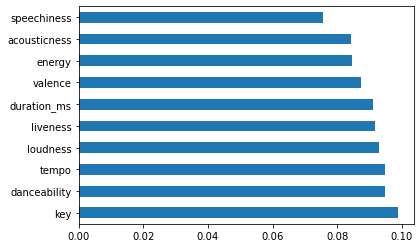

In [74]:

data = pd.read_csv("Resources/spotify_top50_2021.csv")
X = data.iloc[:,5:17]  #independent columns
y = data.iloc[:,4]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [67]:

#Assign the data to X and y
X=music['valence'].values.reshape(-1,1)            ###put the selected columns in ""
y=music['popularity'].values.reshape(-1,1)

print("Shape: ",X.shape,y.shape)

Shape:  (50, 1) (50, 1)


Text(0, 0.5, 'Popularity')

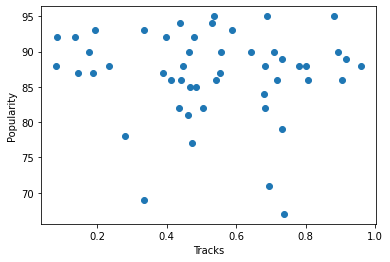

In [68]:
#Plot the data to find out if a linear trend exist
plt.scatter(X,y)
plt.xlabel("Tracks")          ##Add the name of the x label
plt.ylabel("Popularity")          ##Add the name of the y label

Train and Test the data

In [63]:
#Use sklearn train_test_split() function to split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [64]:
#create a model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [65]:
#fit the model to the training data
model.fit(X_train,y_train)

LinearRegression()

Mean_squared_error and r2_score

In [66]:
from sklearn.metrics import mean_squared_error,r2_score

#use our model to make predictions
predicted=model.predict(X_test)

#Score the predictions with mse and r2
mse=mean_squared_error(y_test,predicted)
r2=r2_score(y_test,predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 40.36319197479271
R-squared (R2): 0.08216100057320108
